In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
cons = pd.read_csv('complaints_dec_2014.csv')

In [41]:
cons["Company"]

0                   Ad Astra Recovery Services Inc
1                  Unique Management Services, Inc
2                                 CL Holdings, LLC
3                   Enhanced Recovery Company, LLC
4                       Enhanced Acquisitions, LLC
5               Credit Systems International, Inc.
6                                             Amex
7                             Speedy Cash Holdings
8                                       Afni, Inc.
9                   Enhanced Recovery Company, LLC
10                                        Discover
11                                 Bank of America
12                                      Afni, Inc.
13                           Triple AC Resolutions
14                                 ATG Credit, LLC
15                Certified Recovery Systems, Inc.
16                                         Equifax
17                  Enhanced Recovery Company, LLC
18       HCFS Health Care Financial Services, Inc.
19                             

In [11]:
prod_dict = {}
for x in cons['Product']:
    if x not in prod_dict:
        prod_dict[x] = 1
    else:
        prod_dict[x] += 1

In [12]:
print(prod_dict)

{'Consumer loan': 578, 'Credit card': 1100, 'Payday loan': 141, 'Credit reporting': 2113, 'Money transfers': 107, 'Other financial service': 14, 'Debt collection': 2942, 'Mortgage': 3002, 'Bank account or service': 1136, 'Student loan': 340, 'Prepaid card': 70}


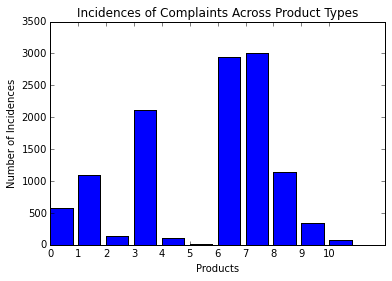

In [39]:
n_groups = 11
index = np.arange(n_groups)
bar_width = .35
x_val_prod = []
y_val_prod = []
for x, y in prod_dict.items():
    x_val_prod.append(x)
    y_val_prod.append(y)
    
plt.bar(index, y_val_prod)
plt.title("Incidences of Complaints Across Product Types")
plt.ylabel("Number of Incidences")
plt.xlabel("Products")
plt.xticks(index)
plt.show()

In [43]:
company_dict = {}
for x in cons["Company"]:
    if x not in company_dict:
        company_dict[x] = 1
    else:
        company_dict[x] += 1

In [59]:
sorted_comp = sorted(company_dict.items(), key = lambda c: c[-1], reverse = True)

In [64]:
top_10 = sorted_comp[:10]
print(top_10)

[('Bank of America', 766), ('Equifax', 737), ('Experian', 675), ('TransUnion', 604), ('Wells Fargo', 598), ('JPMorgan Chase', 545), ('Ocwen', 408), ('Citibank', 403), ('Nationstar Mortgage', 357), ('Capital One', 252)]


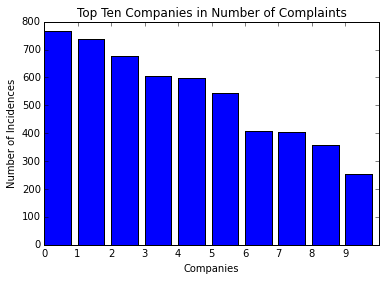

In [65]:
n_groups = 10
index = np.arange(n_groups)
comp_x = []
comp_y = []
for x, y in top_10:
    comp_x.append(x)
    comp_y.append(y)

plt.bar(index, comp_y)
plt.title("Top Ten Companies in Number of Complaints")
plt.ylabel("Number of Incidences")
plt.xlabel("Companies")
plt.xticks(index)
plt.show()